In [2]:
%pylab inline
import pandas
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


In [3]:
##Load CSV file into memory

In [4]:
data = pandas.read_csv('Desktop/final uber data.csv')

In [5]:
data.head()


,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
##Counting the basecode

In [8]:
def count_rows(rows):
    return len(rows)

by_basecode = data.groupby('Base').apply(count_rows)
by_basecode

Base
B02512     205673
B02598    1393113
B02617    1458853
B02682    1212789
B02764     263899
dtype: int64

In [58]:
##Convert datetime format and add some useful columns

In [59]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)
data.head()


,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [70]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [71]:
data.tail()

,Unnamed: 0,Date/Time,Lat,Lon,Base,month,dom
4534322,1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30
4534323,1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30
4534324,1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30
4534325,1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30
4534326,1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,9,30


In [76]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()


,Unnamed: 0,Date/Time,Lat,Lon,Base,month,dom,weekday,hour
4534322,1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,30,1,22
4534323,1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,30,1,22
4534324,1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,30,1,22
4534325,1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,30,1,22
4534326,1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,9,30,1,22


In [67]:
def get_month(mnt):
    return mnt.month

data['month'] = data['Date/Time'].map(get_month)
data.head()



,Unnamed: 0,Date/Time,Lat,Lon,Base,month
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4


In [68]:
def count_rows(rows):
    return len(rows)

by_month = data.groupby('month').apply(count_rows)
by_month


month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
dtype: int64

In [17]:
#Analysis
##Analyse the dom

Text(0.5,1,'Frequency by DoM')

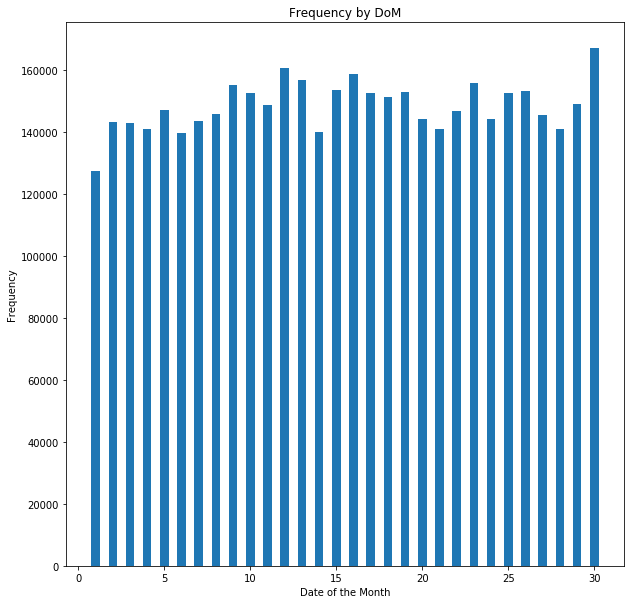

In [72]:
figure(figsize=(10,10))
hist(data.dom, bins=30, rwidth=0.5, range=(0.5, 30.5))

xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM')

In [73]:
#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))
 
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date


dom
1     127430
2     143201
3     142983
4     140923
5     147054
6     139886
7     143503
8     145984
9     155135
10    152500
11    148860
12    160606
13    156892
14    140148
15    153726
16    158921
17    152524
18    151319
19    153088
20    144179
21    141112
22    146952
23    156032
24    144169
25    152667
26    153405
27    145652
28    141157
29    149086
30    167160
31     78073
dtype: int64

In [74]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
31     78073
1     127430
6     139886
14    140148
4     140923
21    141112
28    141157
3     142983
2     143201
7     143503
24    144169
20    144179
27    145652
8     145984
22    146952
5     147054
11    148860
29    149086
18    151319
10    152500
17    152524
25    152667
19    153088
26    153405
15    153726
9     155135
23    156032
13    156892
16    158921
12    160606
30    167160
dtype: int64

(array([ 67227.,  45865.,  48287.,  55230.,  83939., 143213., 193094.,
        190504., 159967., 159148., 165703., 170452., 195877., 230625.,
        275466., 313400., 336190., 324679., 294513., 284604., 281460.,
        241858., 169190.,      0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

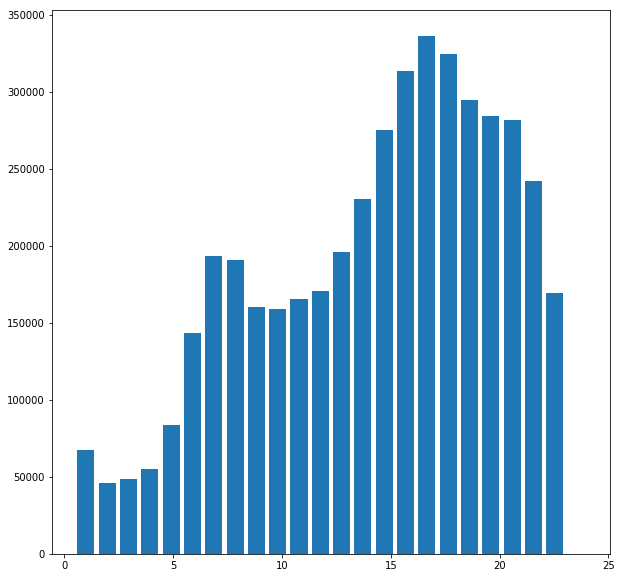

In [78]:
figure(figsize=(10,10))
hist(data.hour, bins=24, range=(.5, 24), rwidth=0.8)

In [27]:
##Analysis using the seaborn lib

In [28]:
##Analyze the hours


In [29]:
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

def millions_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

In [30]:
formatter = FuncFormatter(thousands_format)


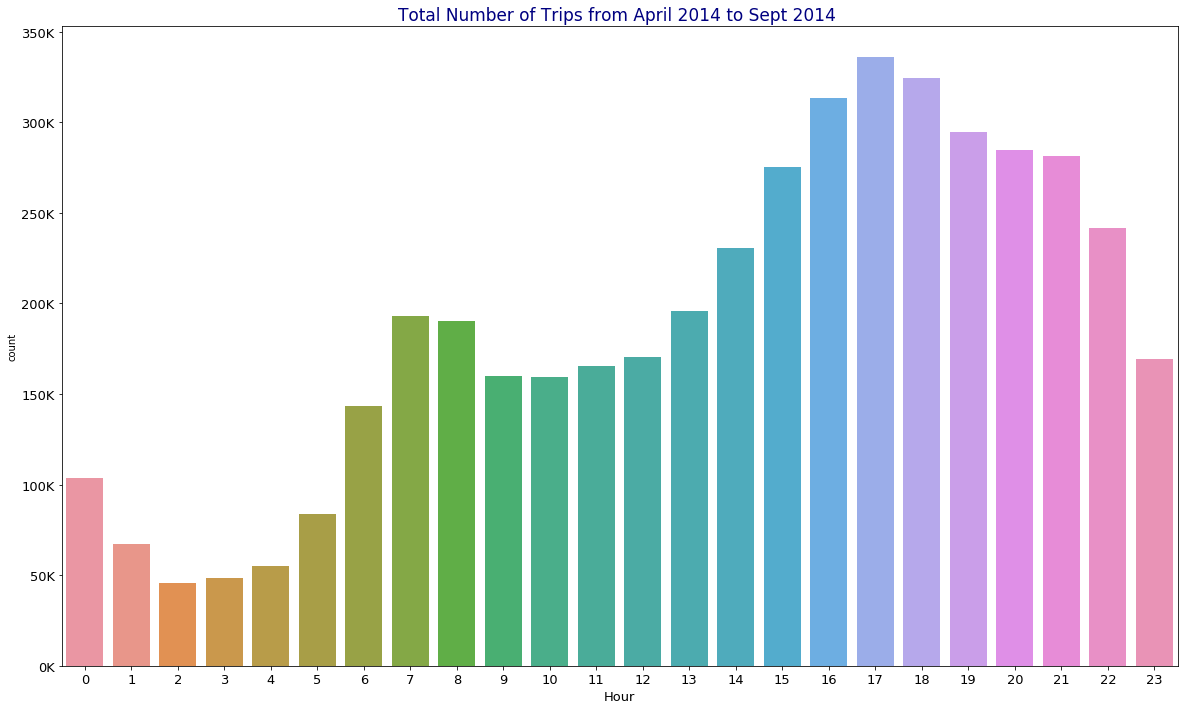

In [77]:
figure(figsize=(20,40))
plt.subplot(3,1,1) 
ax1 = sns.countplot(data.hour, order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips from April 2014 to Sept 2014 ', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.show()

In [80]:
##Analyzing the weekday 

In [81]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Apr','May','Jun','july','Aug','Sept']

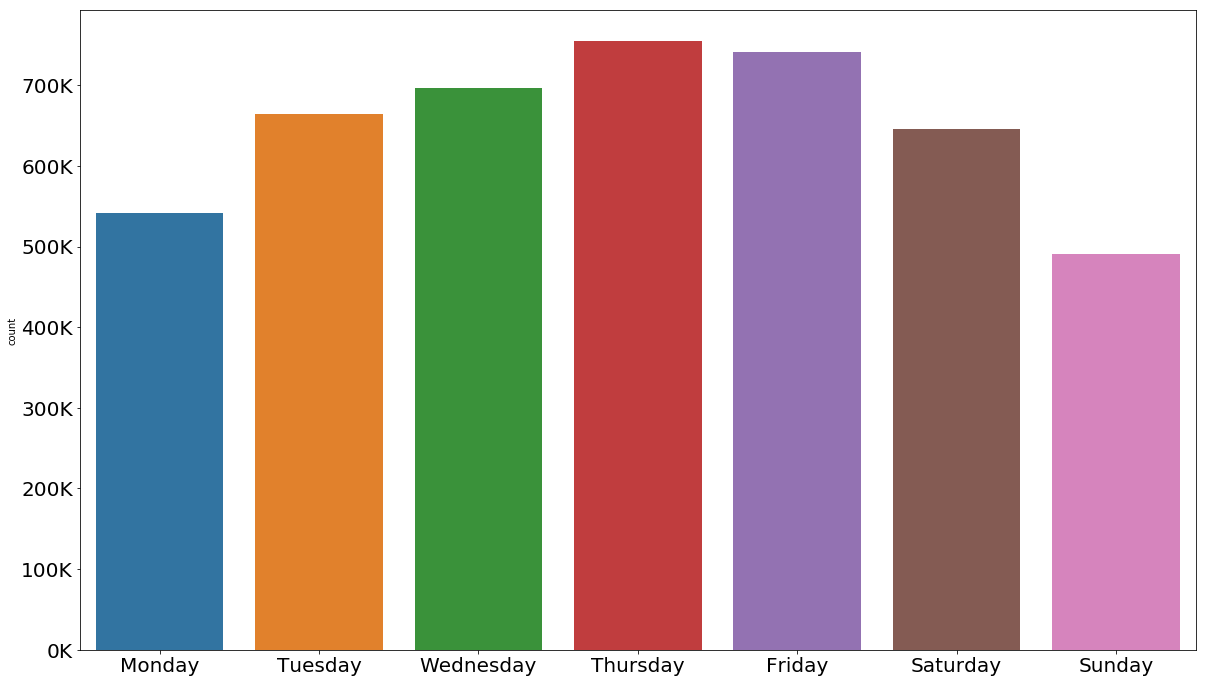

In [82]:
figure(figsize=(20,40))
plt.subplot(3,1,2)
ax2 = sns.countplot(data.weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=20)
plt.xlabel('')

plt.show()

In [ ]:
##Analyse as per month

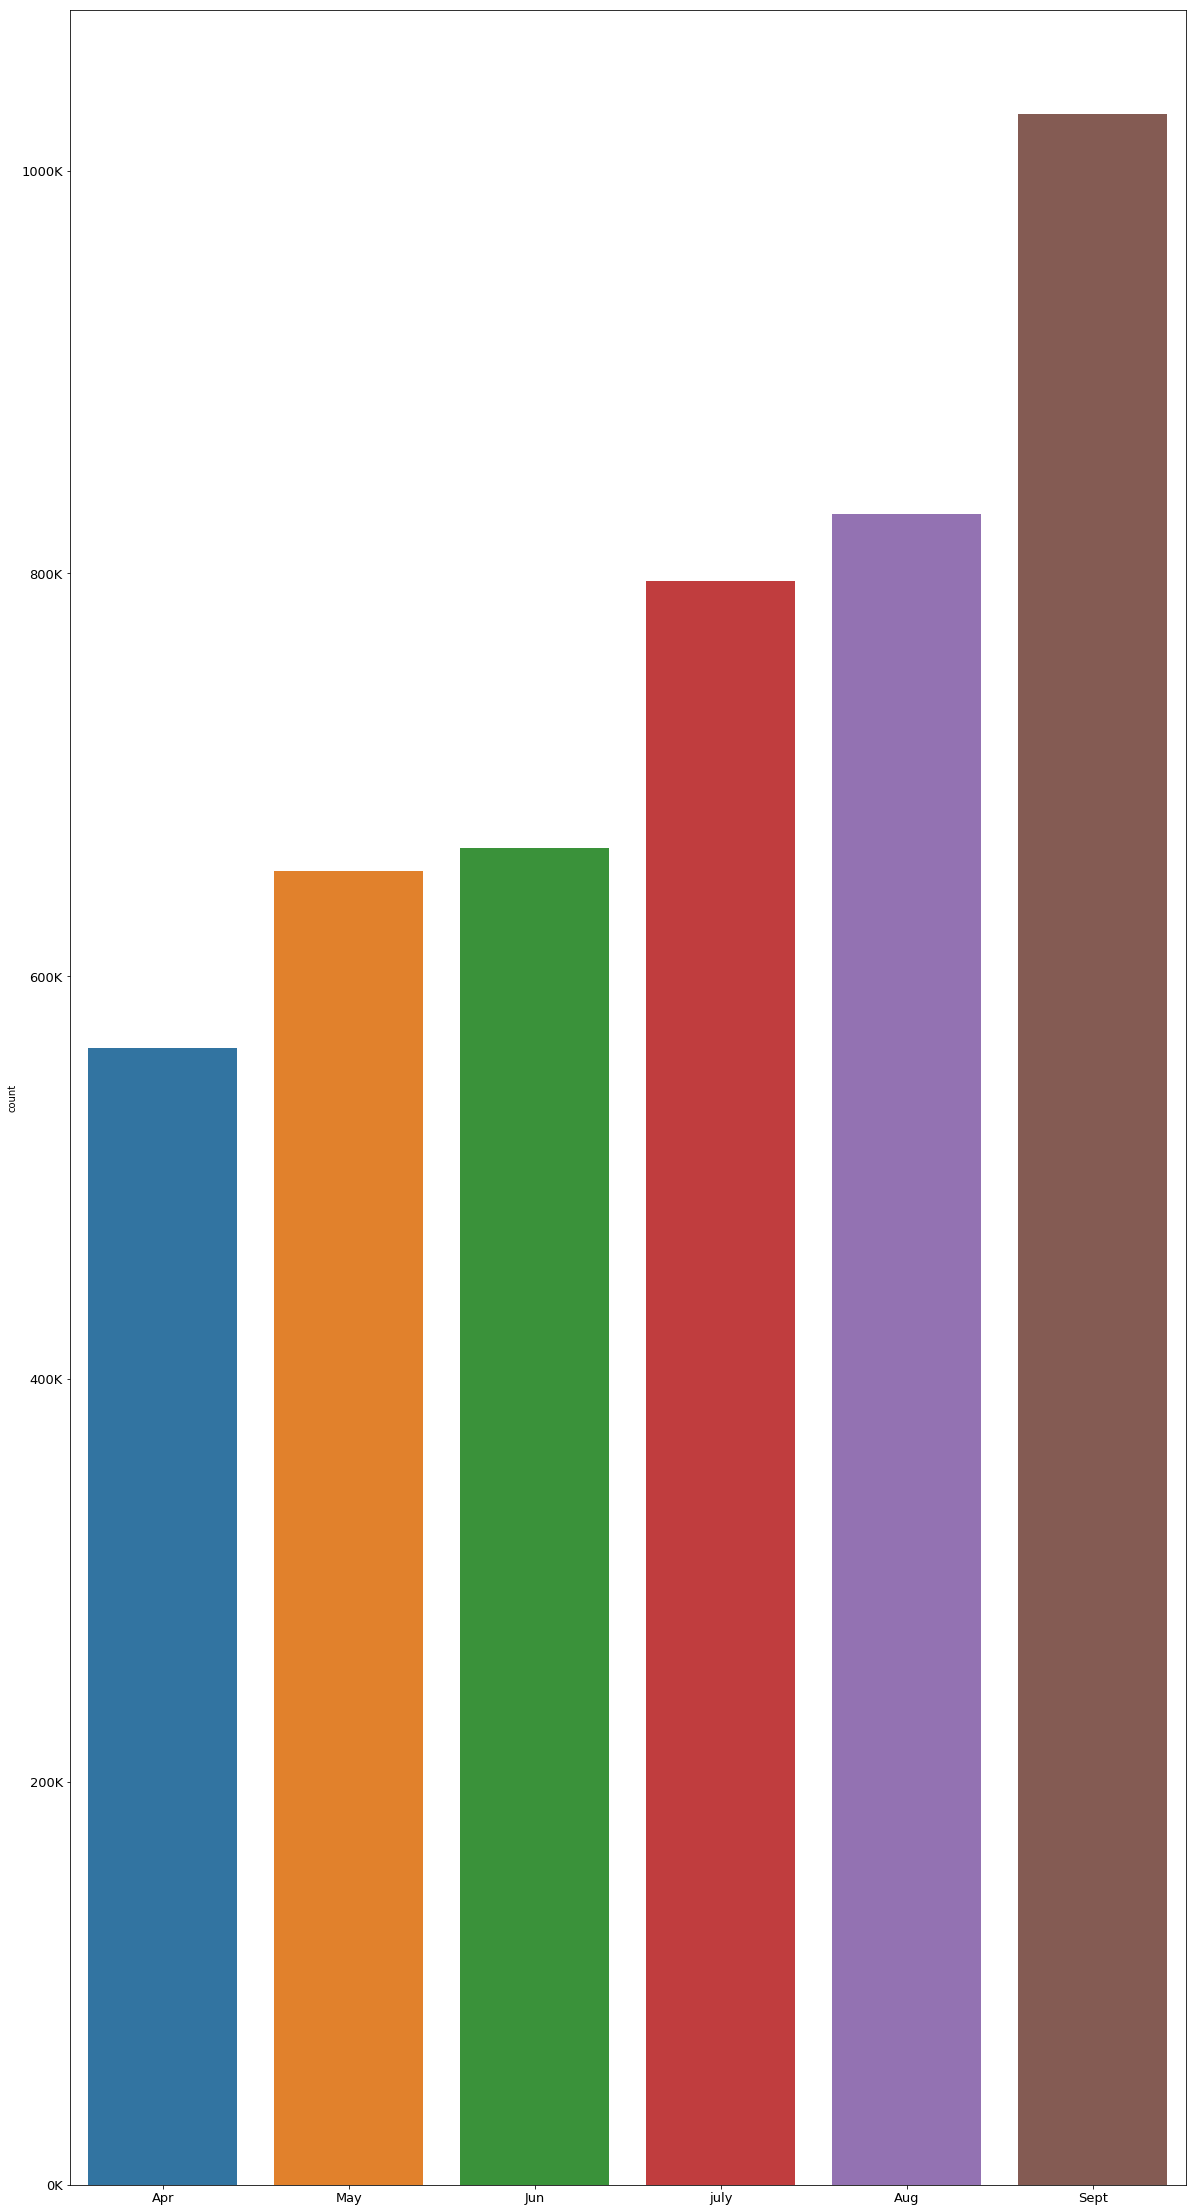

In [83]:
figure(figsize=(20,40))
#same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(data.month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)

#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('')

#fig.subplots_adjust(hspace=.5)
plt.show()

In [84]:
##Cross analysis (hour, dow)

In [85]:
figure(figsize=(30,30))
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

<Figure size 2160x2160 with 0 Axes>

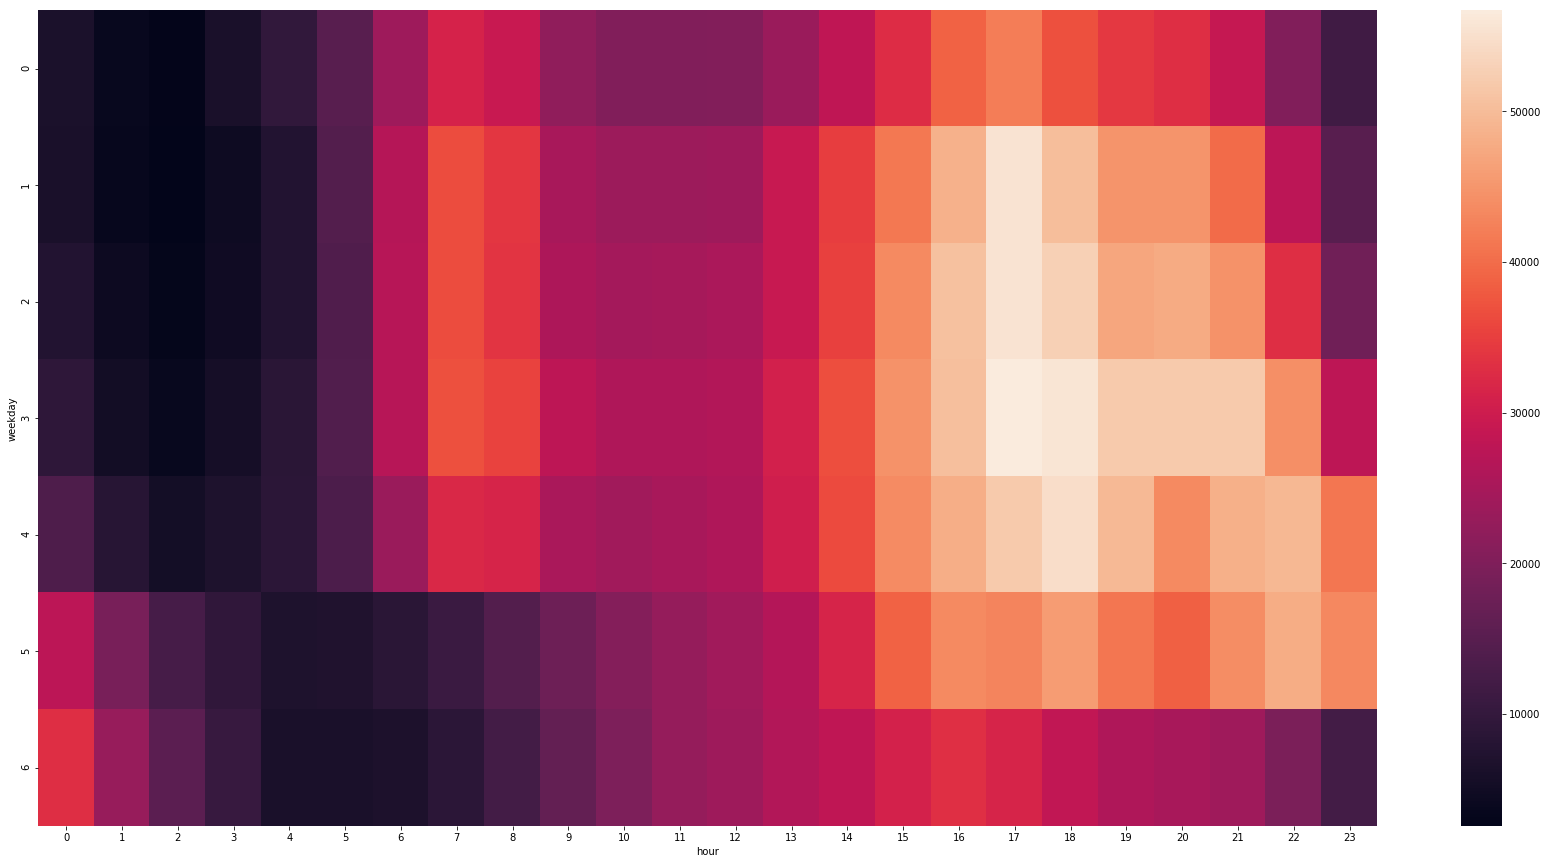

In [86]:
figure(figsize=(30,15))
sns.heatmap (by_cross)

In [87]:
##Analyse using Longitude and Latitude


''

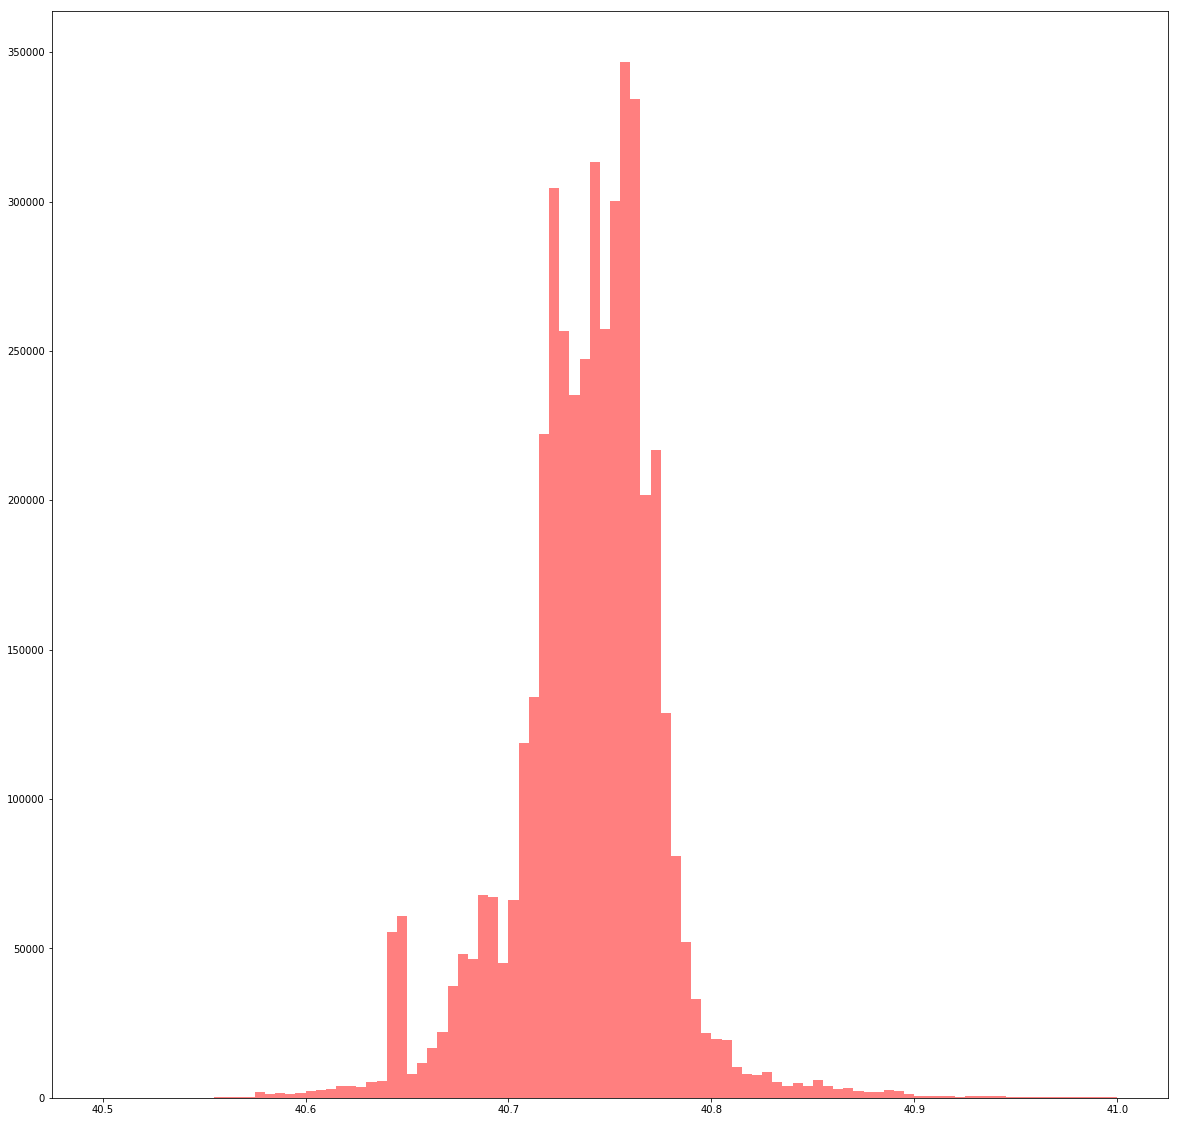

In [88]:
figure(figsize=(20,20))
hist(data['Lat'], bins=100, range = (40.5, 41), alpha=.5, color='r')
;

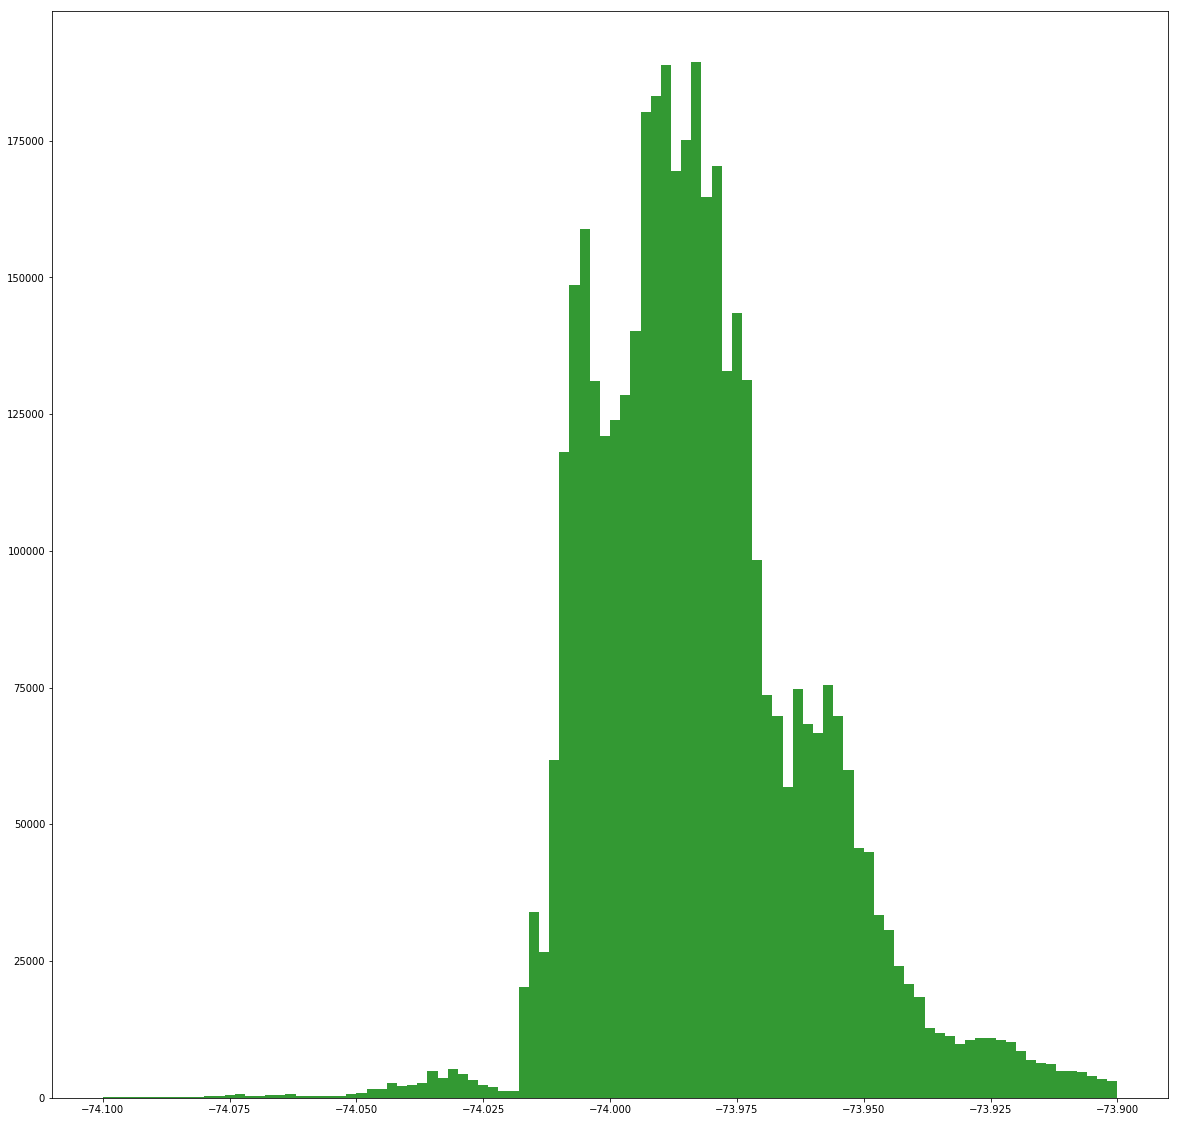

In [89]:
figure(figsize=(20,20))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), alpha=.8, color='g');

''

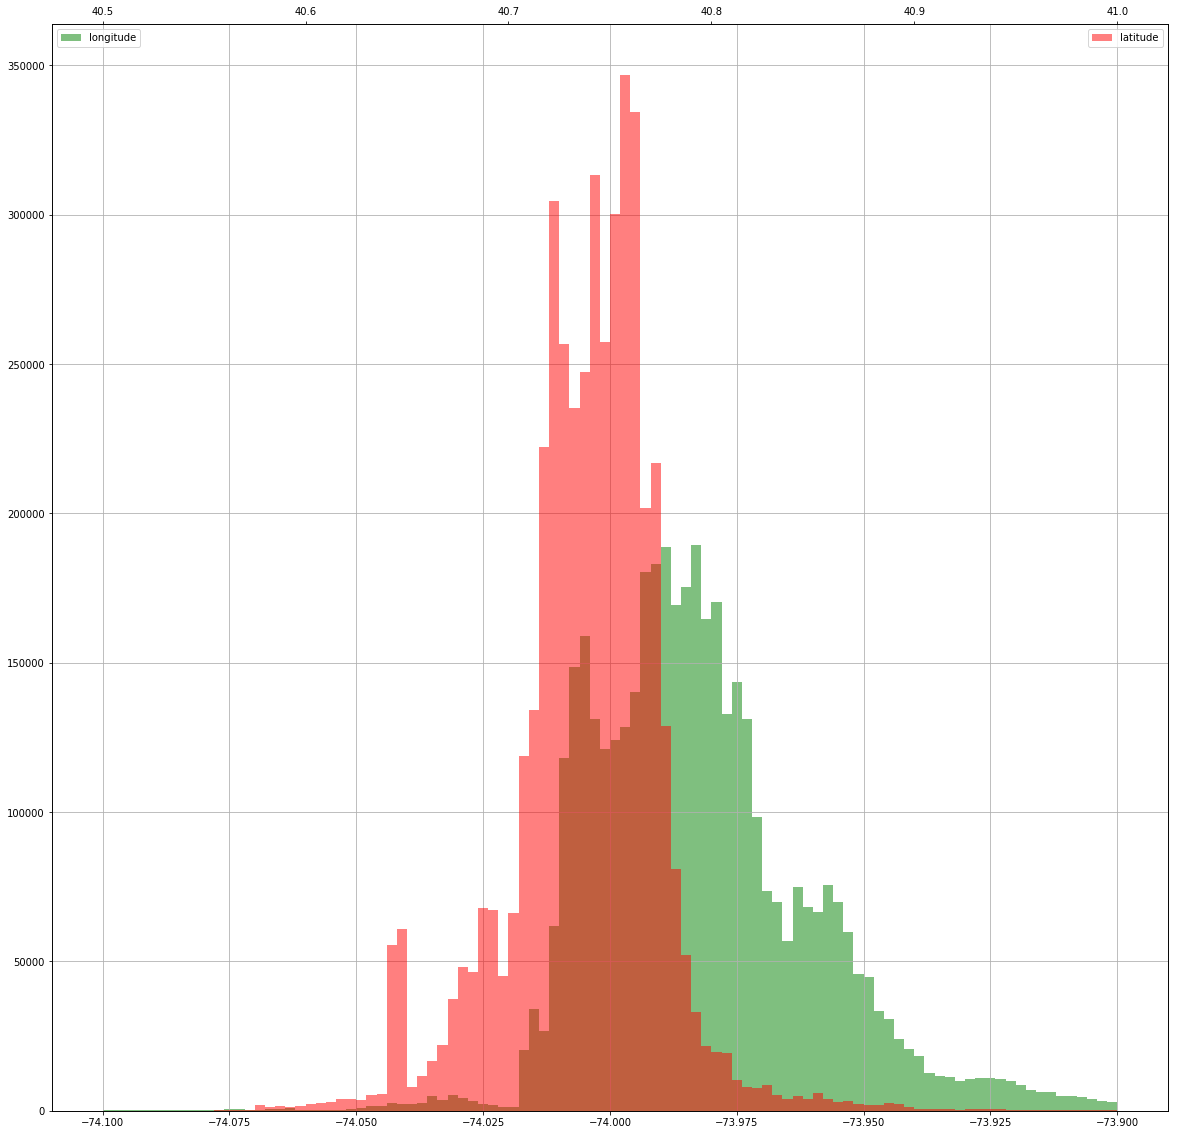

In [90]:
figure(figsize=(20,20))
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.5, 41.1)

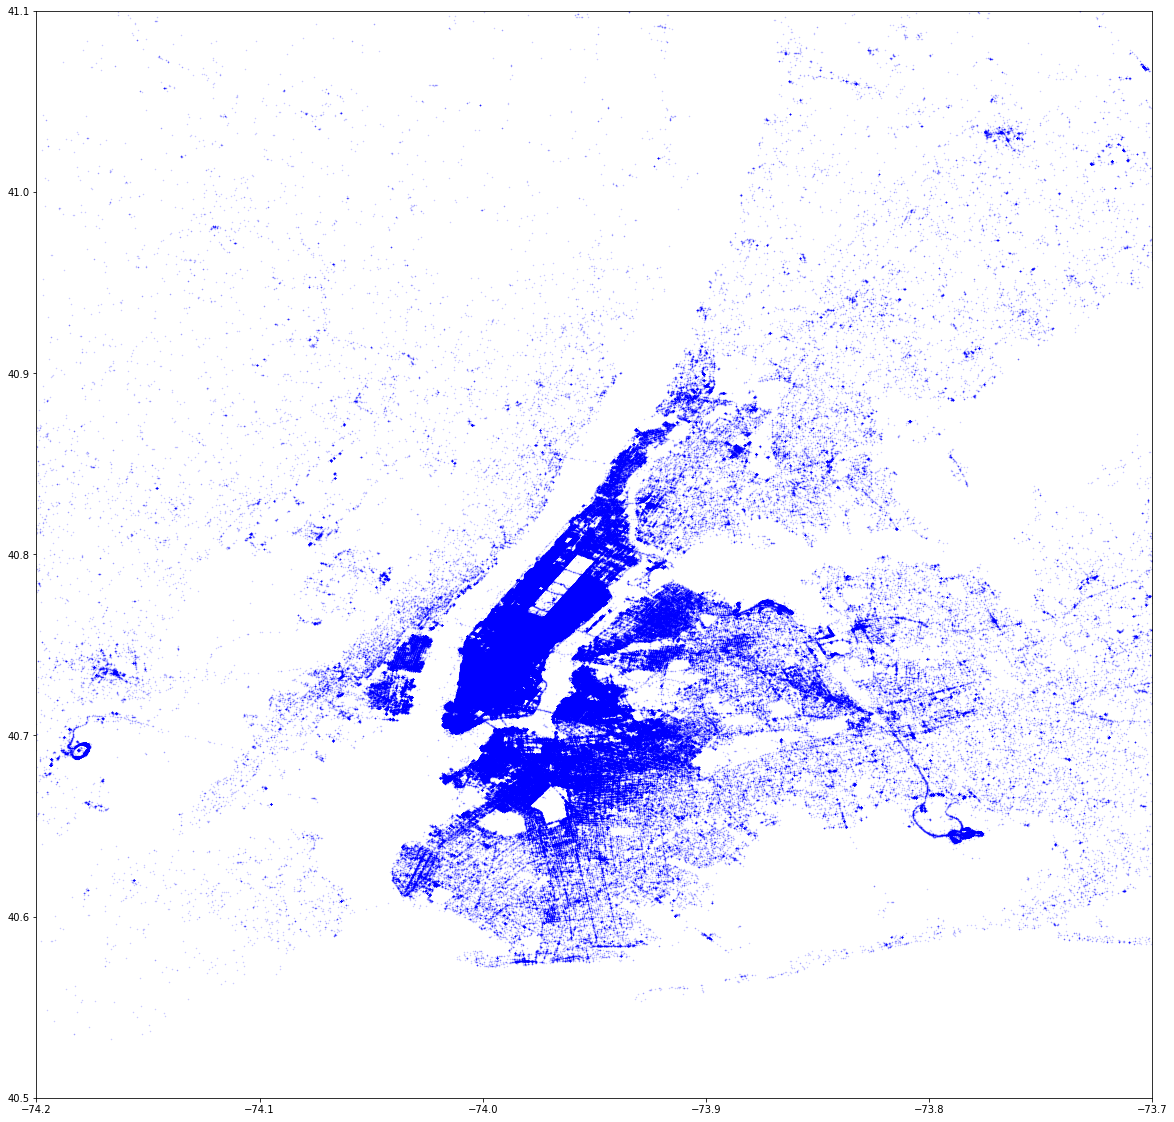

In [92]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.2,color='b')
xlim(-74.2, -73.7)
ylim(40.5, 41.1)


0          40.7690
1          40.7267
2          40.7316
3          40.7588
4          40.7594
5          40.7383
6          40.7223
7          40.7620
8          40.7524
9          40.7575
10         40.7256
11         40.7591
12         40.7271
13         40.6463
14         40.7564
15         40.7666
16         40.7580
17         40.7238
18         40.7531
19         40.7389
20         40.7619
21         40.7530
22         40.6561
23         40.7250
24         40.6950
25         40.9859
26         40.6879
27         40.6878
28         40.7234
29         40.7336
            ...   
4534297    40.7079
4534298    40.7775
4534299    40.7383
4534300    40.6596
4534301    40.7130
4534302    40.7480
4534303    40.7109
4534304    40.8287
4534305    40.7452
4534306    40.7517
4534307    40.7724
4534308    40.7234
4534309    40.7417
4534310    40.7509
4534311    40.7588
4534312    40.6932
4534313    40.7273
4534314    40.7594
4534315    40.7520
4534316    40.7205
4534317    40.7371
4534318    4

C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\shubh\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


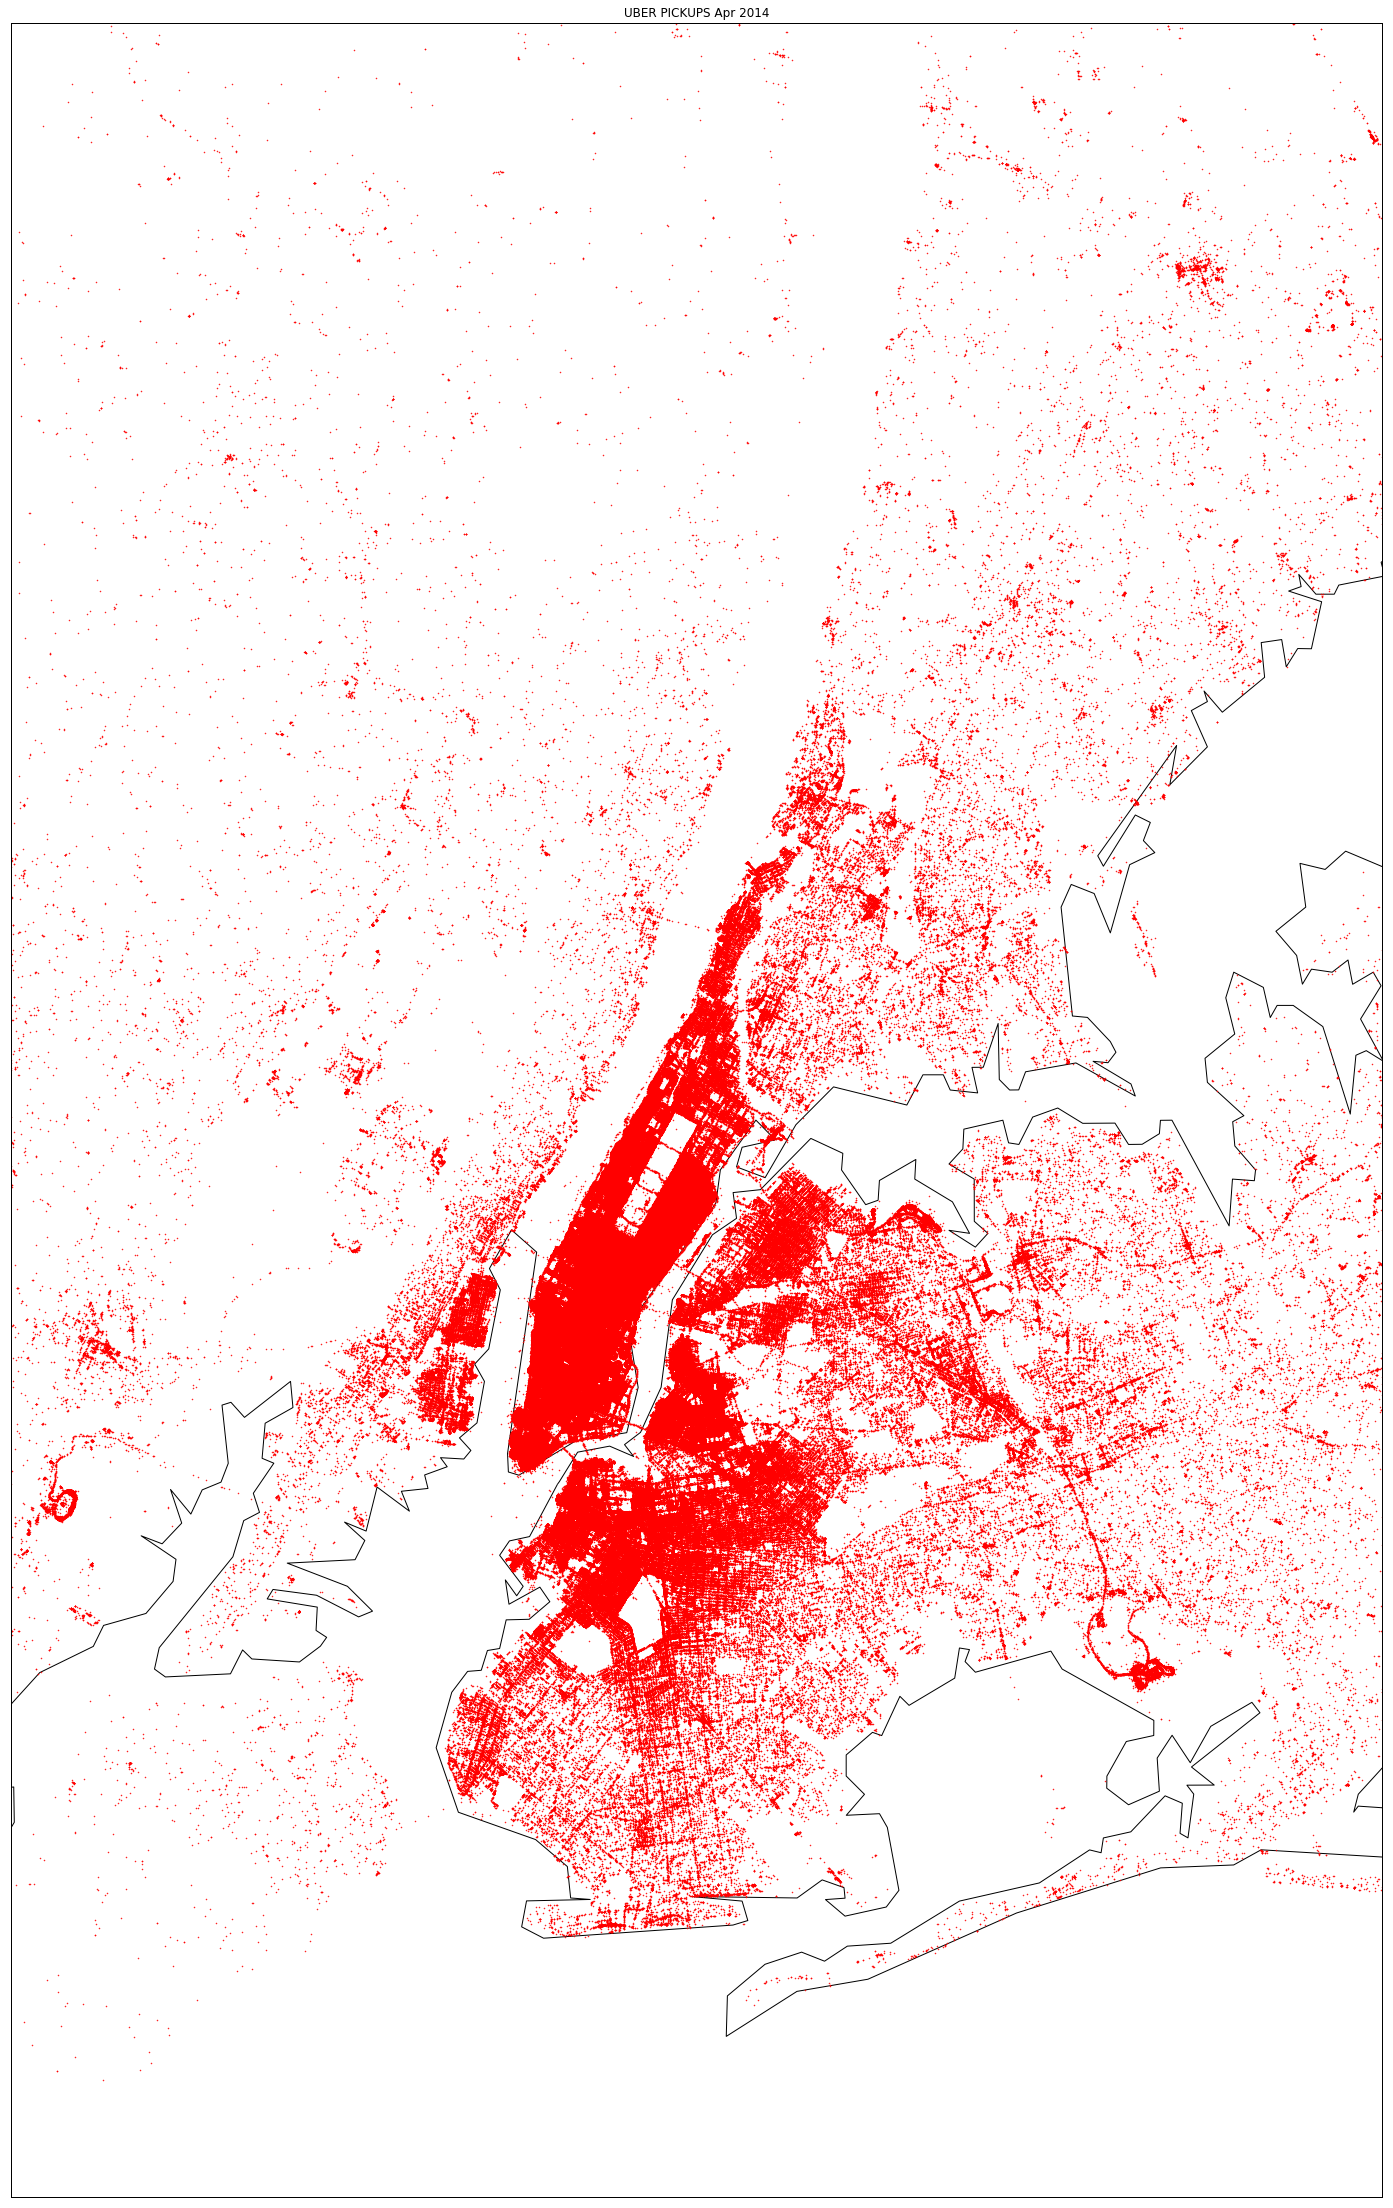

In [93]:
figure(figsize=(40,40))
data = pandas.read_csv('Desktop/final uber data.csv', parse_dates=['Date/Time'])
print(data['Lat'])

my_map =  Basemap(projection='merc', lat_0 = 57, lon_0 = -130,
    resolution = 'h', area_thresh = 1000, llcrnrlon=-74.2,llcrnrlat=40.5,urcrnrlon=-73.7,urcrnrlat=41.1,)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white')
my_map.drawmapboundary()
 

x, y = my_map(data['Lon'].values, data['Lat'].values)

# draw a red dot at cities coordinates
plt.plot(x, y, 'ro', markersize=1, marker='.')
plt.title('UBER PICKUPS Apr 2014')
plt.show()
